<a href="https://colab.research.google.com/github/Jess-Lau/Real-Life-B-W-Video-Colorization-Project/blob/main/ImageColorizerV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing Libraries

from __future__ import absolute_import, division, print_function, unicode_literals
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
from skimage.transform import resize
import glob
import numpy as np
import os
import random
import time
import cv2
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflowjs as tfjs
import tensorflow.keras as k
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense, Flatten, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
#Getting Images

X = []
for imagename in os.listdir('Dataset/Train/'):
    X.append(img_to_array(load_img('Dataset/Train/'+imagename, target_size=(256, 256))))
X = np.array(X, dtype=float)


# Set up train and test data
split = int(0.95*len(X))
Xtrain = X[:split]
Xtrain = 1.0/255*Xtrain

#set up Test data
Xtest = X[split:]
Xtest = 1.0/255*Xtest

In [ ]:
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers import BatchNormalization  # Import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Adam  # Import Adam optimizer

model = Sequential()

# Input Layer
model.add(Conv2D(64, (3, 3), input_shape=(256, 256, 1), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization

# Hidden Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Dropout(0.5))  # Add Dropout
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Dropout(0.5))  # Add Dropout
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Dropout(0.5))  # Add Dropout
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Add BatchNormalization
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

# Compiling the CNN with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.4896 - loss: 0.3355
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.5008 - loss: 0.0475
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 569ms/step - accuracy: 0.5297 - loss: 0.0221
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.5304 - loss: 0.0163
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - accuracy: 0.5204 - loss: 0.0158
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.5334 - loss: 0.0132
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.5208 - loss: 0.0117
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - accuracy: 0.5174 - loss: 0.0136
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.5264 - loss: 0.0112
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.5311 - loss: 0.0136
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.5353 - loss: 0.0108
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━

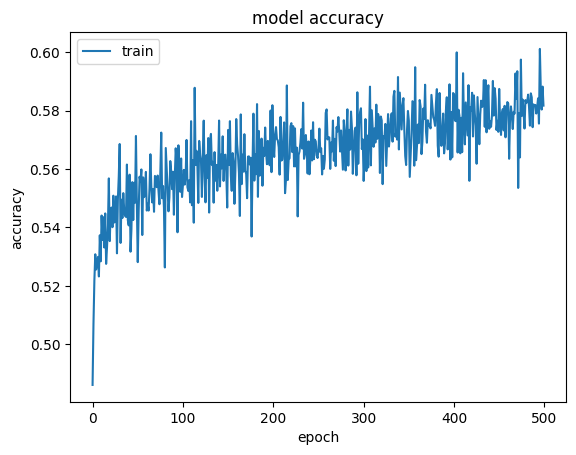

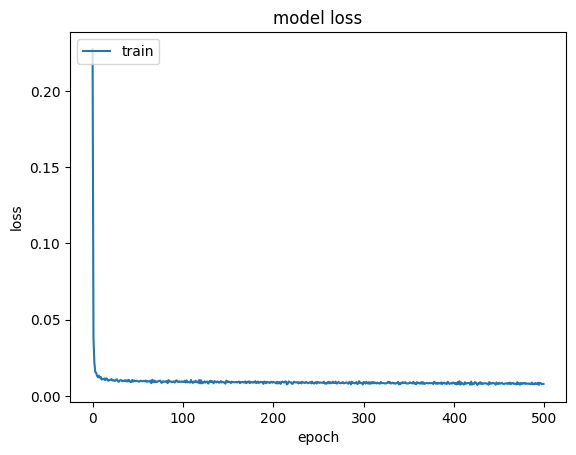

In [ ]:
import matplotlib.pyplot as plt

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

# Generate training data
batch_size = 10
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

# Train model
tensorboard = TensorBoard(log_dir="/output/beta_run")
trainedmodel = model.fit(image_a_b_gen(batch_size), callbacks=[tensorboard],epochs=500, steps_per_epoch=30)


# Summarize history for model accuracy
plt.plot(trainedmodel.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for model loss
plt.plot(trainedmodel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save model

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")


In [ ]:
# load json and create model

from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.weights.h5")

In [ ]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 256)         │       1,179,9

 Total params: 11,691,688 (44.60 MB)

 Trainable params: 3,895,970 (14.86 MB)

 Non-trainable params: 3,776 (14.75 KB)

 Optimizer params: 7,791,942 (29.72 MB)

In [ ]:
# Test images
loaded_model.compile(optimizer='rmsprop', loss='mse', metrics = ['accuracy'])
Xtest = rgb2lab(1.0/255*X[split:])[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X[split:])[:,:,:,1:]
Ytest = Ytest / 128
print(loaded_model.evaluate(Xtest, Ytest, batch_size=10))

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.6231 - loss: 0.0092
[0.00840990711003542, 0.6167911291122437]


Output of the Model
Couldn't read image .DS_Store. Skipping.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


<ipython-input-19-d6290bf16ef7>:62: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 8 negative Z values that have been clipped to zero
  resImage = lab2rgb(cur)


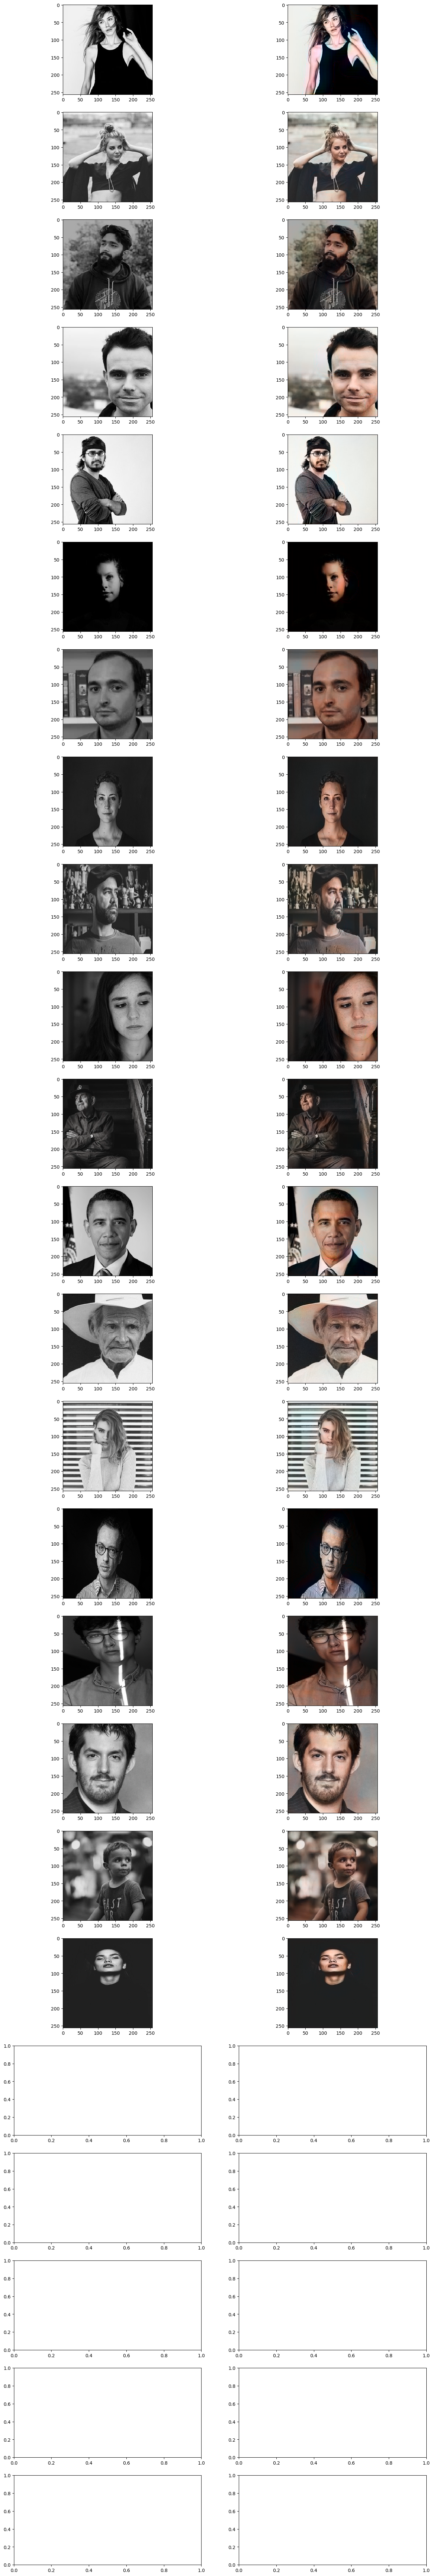

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from keras.models import model_from_json

# Load the model
def load_model():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("model.weights.h5")
    loaded_model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    return loaded_model

# Function to save colorized images
def save_colorized_image(image, filename, folder="Results"):
    if not os.path.exists(folder):
        os.makedirs(folder)
    cv2.imwrite(os.path.join(folder, filename), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Process and colorize images
def process_and_colorize_images(loaded_model):
    fig, ax = plt.subplots(24, 2, figsize=(16, 100))
    row = 0
    colorize = []

    print('Output of the Model')

    for filename in os.listdir('Dataset/Test/'):
        img = cv2.imread('Dataset/Test/' + filename)

        # Check if image is read correctly
        if img is None:
            print(f"Couldn't read image {filename}. Skipping.")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (256, 256))
        colorize.append(img_resized)

        ax[row, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB), interpolation='nearest')
        row += 1

    colorize = np.array(colorize, dtype=float)
    colorize = rgb2lab(1.0/255 * colorize)[:, :, :, 0]
    colorize = colorize.reshape(colorize.shape + (1,))

    # Test model
    output = loaded_model.predict(colorize)
    output *= 128

    row = 0

    # Output colorizations
    for i in range(len(output)):
        cur = np.zeros((256, 256, 3))
        cur[:, :, 0] = colorize[i][:, :, 0]
        cur[:, :, 1:] = output[i]
        resImage = lab2rgb(cur)

        # Save the colorized image
        save_colorized_image(np.uint8(resImage * 255), f"colorized_{i}.png")

        ax[row, 1].imshow(resImage, interpolation='nearest')
        row += 1

    plt.show()

# Load the model and process images
loaded_model = load_model()
process_and_colorize_images(loaded_model)
